In [6]:
# importing dependencies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
# reading the csv file using pandas and creating a dataframe 
df_bike_cl = pd.read_csv("cleaned_data/rides.csv")
# displaying the top rows of the dataframe 
df_bike_cl.head(1)

,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Station ID,Checkout Station,Return Station ID,Return Station,Trip Duration Minutes,Trip Month,Trip Date,Trip Year,Trip Day of Week,Trip Hour
0,9900285854,Annual (San Antonio B-cycle),207.0,2014-10-26 00:00:00,2018-08-29 13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10,26,2014,Sunday,13


#### Each ride includes a trip ID, the rider’s Membership Type, a Bicycle ID, the ride checkout  date, time,station ID, Station Name ,the return station ID, Station name and duration of the trip

## calculate and visualize total number of bike rides per year 

In [11]:
df_bike_year = df_bike_cl.groupby('Trip Year')
number_of_rides_per_year = df_bike_year['Trip ID'].count()
number_of_rides_per_year

Trip Year
2013      1457
2014    155703
2015    184521
2016    184680
2017    193492
2018    271418
Name: Trip ID, dtype: int64

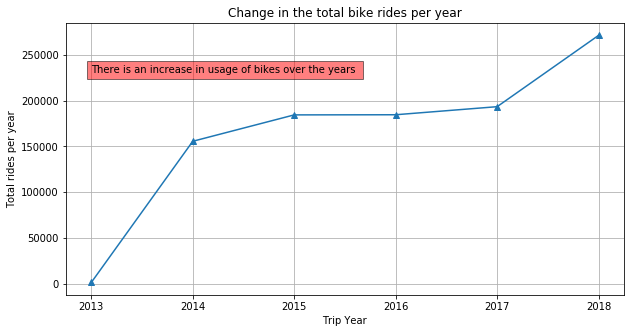

In [18]:
# Plot the total number of rides per year using line graph
Total_rides_per_year_chart = number_of_rides_per_year.plot(kind = "line",grid=True,marker='^',title = "Change in the total bike rides per year",figsize = (10,5))
                                                                                                                    
Total_rides_per_year_chart.set_xlabel("Trip Year")
Total_rides_per_year_chart.set_ylabel("Total rides per year")
plt.text(2013,230000,"There is an increase in usage of bikes over the years ",bbox=dict(facecolor='red',alpha =0.5))
plt.savefig("Images/Rides_per_Year.png")
plt.show()


## calculate and visualize  total number of bike rides per month

In [20]:
df_bike_month = df_bike_cl['Trip Month'].value_counts()
df_bike_month

3     186687
4     118056
5     111973
10     90380
6      84971
7      83114
2      73500
9      57769
1      55672
11     52282
8      49179
12     27688
Name: Trip Month, dtype: int64

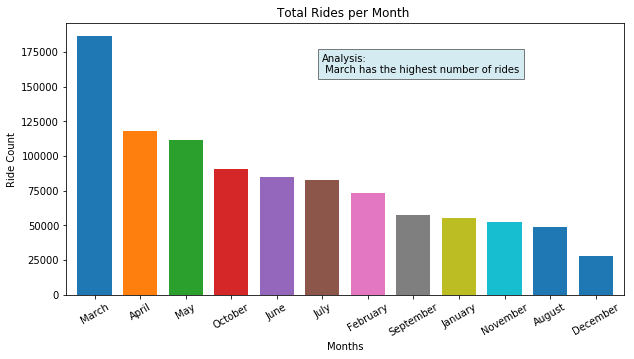

In [41]:
# plot the graph for Total Rides per Month(try to add percentage )
import calendar
mn=[calendar.month_name[int(x)] for x in df_bike_month.index.values.tolist()]
bike_chart = df_bike_month.plot.bar(title = "Total Rides per Month ",width = 0.75,figsize = (10,5),rot = 30)
bike_chart.set_xticklabels(mn)
bike_chart.set_xlabel("Months")
bike_chart.set_ylabel("Ride Count")
plt.text(5,160000,"Analysis:\n March has the highest number of rides",bbox=dict(facecolor='lightblue',alpha =0.5))
plt.savefig("Images/Rides_per_Month.png")
plt.show()


# Third month, March has highest number of rides , can you guess why ? 
## we will let you know in a bit 


## Analyze  and Display The Busiest Day of Week 



In [25]:
busy_day = df_bike_cl['Trip Day of Week'].value_counts()
busy_day

Saturday     196760
Sunday       162435
Friday       154779
Monday       125567
Thursday     124259
Wednesday    114417
Tuesday      113054
Name: Trip Day of Week, dtype: int64

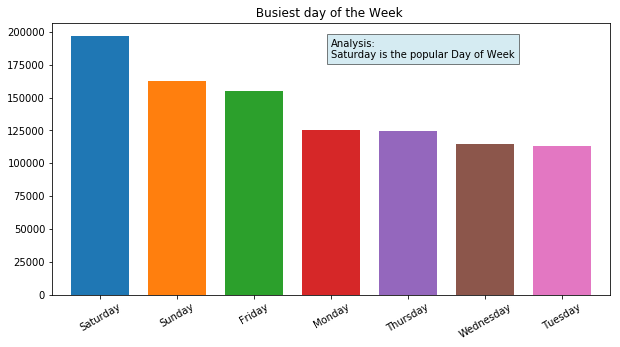

In [36]:
# plot the graph for busiest day of the week 
plt.xlabel = "Days of a week "
plt.ylabel = "Ride count"
week_chart = busy_day.plot(kind = "bar" , title = " Busiest day of the Week  ",width = 0.75,figsize = (10,5),rot = 30)
plt.text(3,180000,"Analysis:\nSaturday is the popular Day of Week",bbox=dict(facecolor='lightblue',alpha =0.5))
plt.savefig("Images/Busy_Week.png")
plt.show()


## Analyze and Display The  Busiest hours of the day 


In [43]:
busy_hour = df_bike_cl['Trip Hour'].value_counts()
busy_hour

17    84145
16    83542
15    83420
13    82475
14    81756
12    76883
18    71090
11    63713
19    56589
10    48347
20    43232
9     39620
21    35217
8     33570
22    27529
23    18760
7     16770
0     13676
1     10077
2      8803
6      5709
3      2827
5      1955
4      1566
Name: Trip Hour, dtype: int64

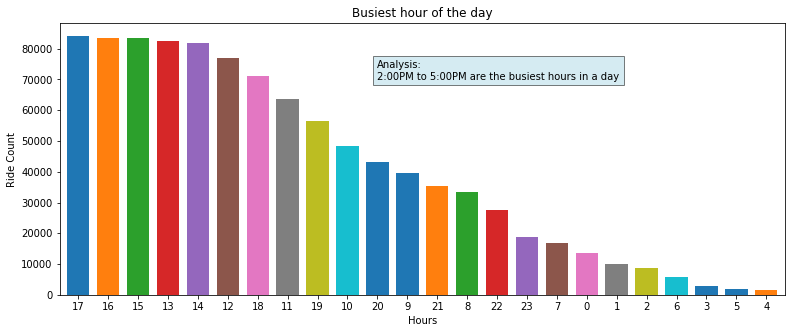

In [46]:
# plot the graph for busiest hour of the day 
hour_chart = busy_hour.plot(kind = "bar" , title = "Busiest hour of the day",width = 0.75,figsize = (13,5),rot = 0)
hour_chart.set_xlabel("Hours")
hour_chart.set_ylabel("Ride Count")
plt.text(10,70000,"Analysis:\n2:00PM to 5:00PM are the busiest hours ",bbox=dict(facecolor='Lightblue',alpha =0.5))
plt.savefig("Images/Busy_Hour.png")
plt.show()


##  Analyze most popular stations  and Display top 6


In [47]:
popular_checkout_station = df_bike_cl['Checkout Station'].value_counts()
popular_checkout_station.sort_values(ascending = False).head(6)

21st & Speedway @PCL        42167
Riverside @ S. Lamar        36988
City Hall / Lavaca & 2nd    34604
2nd & Congress              33407
5th & Bowie                 32405
Rainey St @ Cummings        31680
Name: Checkout Station, dtype: int64

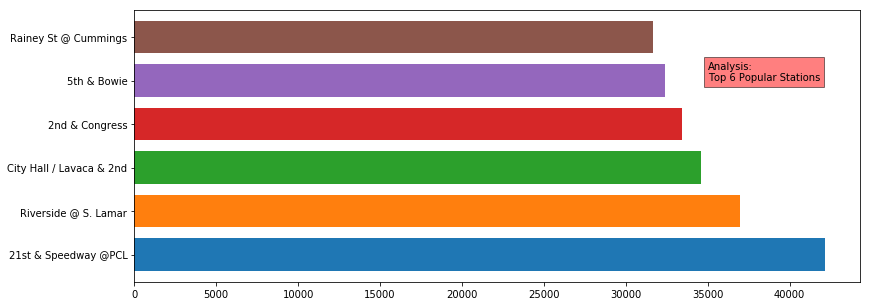

In [56]:
# plot the graph for the popular stations 
pop_station_chart = popular_checkout_station[0:6].plot(kind = "barh",width = 0.75,figsize = (13,5))
plt.text(35000,4,"Analysis:\nTop 6 Popular Stations",bbox=dict(facecolor='red',alpha =0.5))
plt.savefig("Images/Pop_Station.png")
plt.show()

###   These  stations  receive significantly more rentals than any other area. These are located  around UT Campus 

In [57]:
# Map for the above locations 
 

## Analyze  Popular Membership types and Display Top 6



In [59]:
popular_membership_type = df_bike_cl['Membership Type'].value_counts() 
popular_membership_type.head(6)

Walk Up                           368322
Local365                          167363
U.T. Student Membership           158480
24-Hour Kiosk (Austin B-cycle)    108672
Local30                            54774
Weekender                          43880
Name: Membership Type, dtype: int64

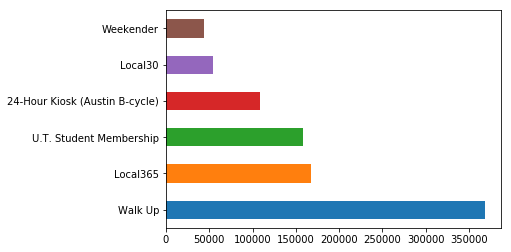

In [61]:
# plot the graph for the popular mebership types 
popular_membership_type[0:6].plot(kind = "barh")

## Analyze the trend in membership types over the years and display the top 6 

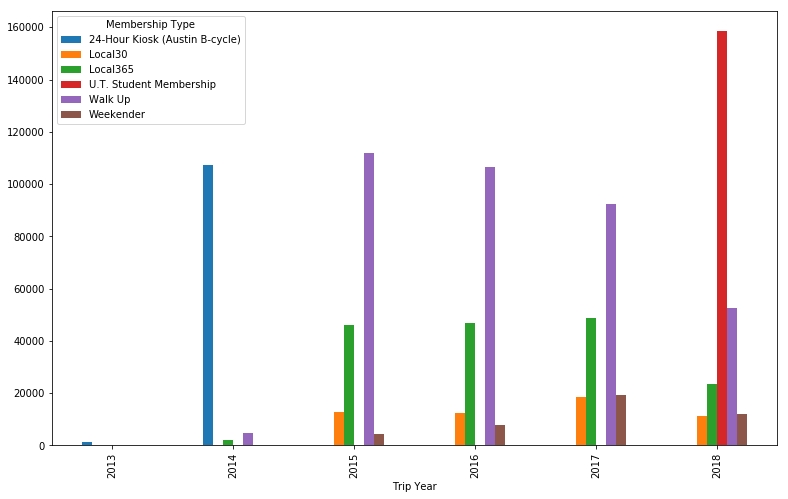

In [63]:
# find the popular member ship types
mem_type_df = df_bike_cl.groupby(["Membership Type"],as_index=True).size()
mem_type_df = mem_type_df.sort_values(ascending=False)

#select the data for the top 6 memberships 
mem_type_year = []

for memtype in mem_type_df[:6].to_dict():
    #print(memtype)
    df_temp = df_bike_cl.loc[df_bike_cl["Membership Type"]==memtype]
    mem_type_year.append(df_temp)
    
mem_type_year_df = pd.concat(mem_type_year)

# Now plot the data, since we have the top 6 membership types now group by Year and display
fig, ax = plt.subplots(figsize=(13,8))
# Without unstack, the rows are displayed seperately. 
mem_type_year_df.groupby(['Trip Year','Membership Type']).count()['Trip ID'].unstack().plot.bar(ax=ax)
